In [ ]:
import numpy as py 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt

RendererRegistry.enable('default')

In [9]:
df= pd.read_csv("d:\روااد\data\diamonds.csv")
df.isnull().sum()
df=df.dropna()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_2824\679189323.py:1: SyntaxWarning: invalid escape sequence '\d'
  df= pd.read_csv("d:\روااد\data\diamonds.csv")


<Axes: xlabel='price'>

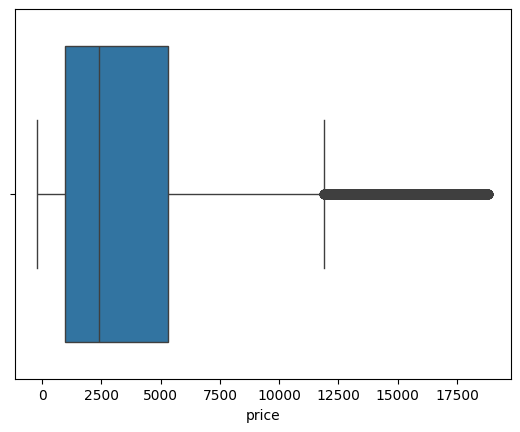

In [ ]:
# see if we have some outliers
sns.boxplot(data=df, x='price')

In [ ]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1 - 1.5 *IQR
upper_bound=Q1 + 1.5 *IQR
outliers_df = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers_df
#we have 8357 rows of outliers

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
18463       18463   1.54    Premium     I     SI1   61.8   57.0   7512  7.43   
18464       18464   1.07  Very Good     F     VS1   62.0   56.0   7513  6.51   
18465       18465   1.21      Ideal     H     VS2   62.9   55.0   7513  6.77   
18466       18466   1.29      Ideal     H     SI1   61.8   55.0   7513  6.99   
18467       18467   1.50      Ideal     J     VS2   61.6   58.0   7515  7.33   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
27745       27745   2.00  Very Good     H     SI1   62.8   57.0  18803  7.95   
27746       27746   2.07      Ideal     G     SI2   62.5   55.0  18804  8.20   
27747       27747   1.51      Ideal     G      IF   61.7   55.0  18806  7.37   
27748       27748   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90   
27749       27749   2.29    Premium     I     VS2   60.8   60.0  18823  8.50   

          y     z  
18463  7.37  4.57  
18464  6.55  4.05  
18465  6.80  4.27  
18466  6.95  4.31  
18467  7.38  4.53  
...     ...   ...  
27745  8.00  5.01  
27746  8.13  5.11  
27747  7.41  4.56  
27748  7.97  5.04  
27749  8.47  5.16  

[8357 rows x 11 columns]

In [49]:
#هعمل تصنيف للداتا ان كانت عاديه ولا اوتلاير في كولوم جديد
df['type'] = ['Outlier' if (x < lower_bound or x > upper_bound) else 'Normal' for x in df['price']]
counts = df['type'].value_counts().reset_index()
counts.columns = ['type', 'count']
df

Unnamed: 0  carat      cut color clarity  depth  table  price     x  \
0               0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95   
1               1   0.21  Premium     E     SI1   59.8   61.0    326  3.89   
2               2   0.23     Good     E     VS1   56.9   65.0    327  4.05   
3               3   0.29  Premium     I     VS2   62.4   58.0    334  4.20   
4               4   0.31     Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...      ...   ...     ...    ...    ...    ...   ...   
53942       53942   0.80    Ideal     E     SI2   60.8   56.0   2939  6.02   
53943       53943   0.73    Ideal     F     VS2   62.7   58.0   2939  5.72   
53944       53944   0.72    Ideal     E     SI2   62.4   57.0   2939  5.71   
53945       53945   0.75    Ideal     G     VS2   60.6   55.0   2939  5.93   
53946       53946   0.80  Premium     E     SI2   59.9   58.0   2939  6.03   

          y     z is_outlier    type  
0      3.98  2.43     Normal  Normal  
1      3.84  2.31     Normal  Normal  
2      4.07  2.31     Normal  Normal  
3      4.23  2.63     Normal  Normal  
4      4.35  2.75     Normal  Normal  
...     ...   ...        ...     ...  
53942  6.01  3.66     Normal  Normal  
53943  5.77   3.6     Normal  Normal  
53944  5.74  3.57     Normal  Normal  
53945  5.91  3.59     Normal  Normal  
53946  5.96  3.59     Normal  Normal  

[53942 rows x 13 columns]

In [ ]:
fig = px.scatter(
    df, x='carat', y='price',
    color='is_outlier',
    title='Diamond Price vs Carat (with Outliers Highlighted)',
    labels={'carat': 'Carat', 'price': 'Price ($)', 'is_outlier': 'Type'},
    hover_data=['cut', 'color', 'clarity']
)

fig.show()


In [54]:
fig2 = px.pie(
    counts,                  
    names='type',            
    values='count',          
    title='Outliers vs Normal Data',
    color='type',
    color_discrete_map={'Outlier': 'red', 'Normal': 'green'}
)
fig2.show()


In [132]:

fig = px.box(df, x='cut', y='price', points="all", color='cut',
             title="توزيع السعر حسب جودة القطعة (cut)",
             labels={"cut": "جودة القطعة", "price": "السعر"})

fig.update_layout(
    width=1200,
    height=600,
    font=dict(size=14)
)

fig.show()

In [133]:
df.columns
print(df['z'].unique()[:20])
df['z'] = df['z'].str.strip()
df['z'] = pd.to_numeric(df['z'], errors='coerce')
df = df.dropna(subset=['x', 'y', 'z'])
#كان كولوم  البعد الثالث متعرف ك اوبجيكت حولته لنيومرك  و اتاكدت ان مفيش قيم  nan

[2.43 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 2.73 2.46 2.33 2.71 2.27
 2.68 2.7  2.66 2.41 2.62 2.59]


AttributeError: Can only use .str accessor with string values!

In [ ]:
df['volume'] = df['x'] * df['y'] * df['z']
#حسبت حجم الجوهره في كولوم جديد 

C:\Users\user\AppData\Local\Temp\ipykernel_2824\4014214215.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
fig = px.scatter_3d(
    df,
    x='volume',
    y='price',
    z='color',  #
    color='color',
    size='volume',
    title='3D Plot: Volume vs Price vs Color',
    width=1200,
    height=700
)
fig.show()

In [136]:
df.to_excel(r"D:\روااد\work\diamond_data_cleaned.xlsx", index=False)
